In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib as mpl
import pandas as pd
import xarray as xr
import sys
sys.path.insert(0, '../lib')
sys.path.insert(0, '../src')

import ml_estimation as ml
import model1_plots as mp
import model1 as mod1
from scipy.stats import norm, beta
from statsmodels.base.model import GenericLikelihoodModel


In [2]:
df = pd.read_csv('../mod/model1/example_bins.csv')
df_bin_fit = pd.read_csv('../mod/model1/examble_bins_fit.csv')

In [3]:
df_bin_fit.head()

,Unnamed: 0,bincenter_h,bincenter_d,alpha,beta,conv_b,alpha1,beta1,alpha2,beta2,p,conv_mb,mu,sigma
0,0,1000.0,0,0.652303,2.632243,True,3.393743,46.446543,0.724350,1.272615,0.650977,True,0.524033,0.722187
1,1,6000.0,0,1.040661,1.295376,True,1.040633,1.295352,NaN,NaN,1.000000,True,0.418379,0.681215
2,2,9000.0,0,1.240030,1.103489,True,7.043827,2.700983,0.868225,1.717056,0.574455,True,0.393134,0.682773
3,3,12000.0,0,3.346579,1.380626,True,48.923070,11.103414,1.151864,1.442526,0.791616,True,0.331026,0.595683
4,4,1000.0,1,0.961459,7.837352,True,4.031358,60.866219,0.614920,1.778981,0.815277,True,1.174367,0.719539


In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,h_t,d_t,ct,cloud,h_t_next,d_t_next,ct_next,cloud_next,dh,dd,bincenter_h,bincenter_d
0,7902,7902,1242.484253,0.027543,2.0,cloud,13641.080078,-0.046382,4.0,cloud,12398.595825,-0.073925,1000.0,0
1,11449,11449,773.386169,0.076220,2.0,cloud,1017.549133,2.079899,5.0,cloud,244.162964,2.003679,1000.0,0
2,11676,11676,705.325745,-0.011202,2.0,cloud,493.514404,0.596952,2.0,cloud,-211.811340,0.608154,1000.0,0
3,12949,12949,1160.384521,-0.088163,2.0,cloud,943.995056,1.255223,2.0,cloud,-216.389465,1.343387,1000.0,0
4,24208,24208,1236.074951,-0.054084,2.0,cloud,1254.692383,1.523406,5.0,cloud,18.617432,1.577490,1000.0,0


1000.0 0.0
6000.0 0.0


C:\Users\nerin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:881: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
C:\Users\nerin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:881: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))


9000.0 0.0
12000.0 0.0
1000.0 1.0
6000.0 1.0


C:\Users\nerin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:881: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
C:\Users\nerin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:881: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))


9000.0 1.0
12000.0 1.0
1000.0 2.0
6000.0 2.0
9000.0 2.0
12000.0 2.0
1000.0 3.0
6000.0 3.0
9000.0 3.0
12000.0 3.0


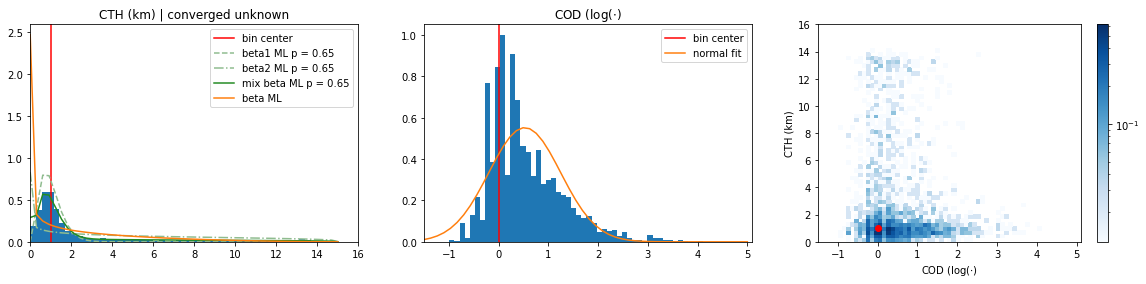

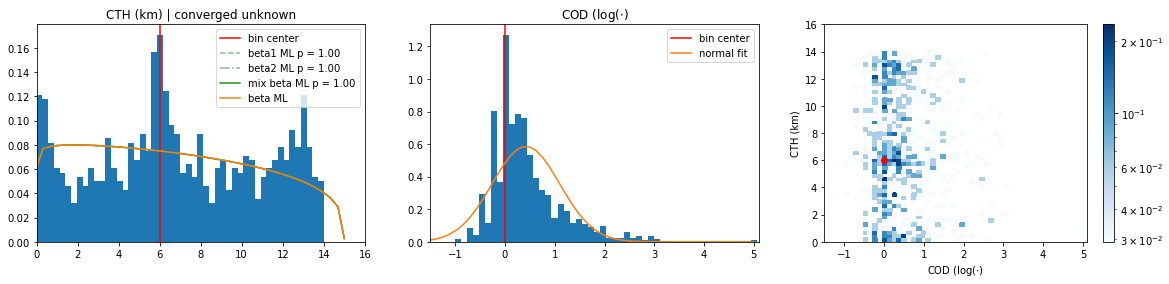

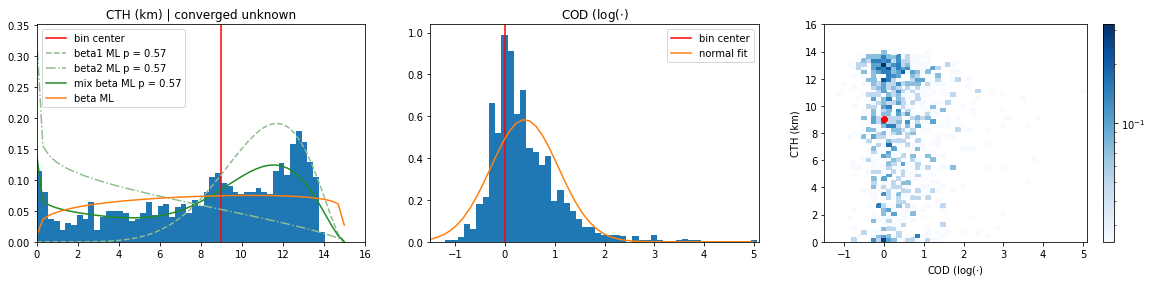

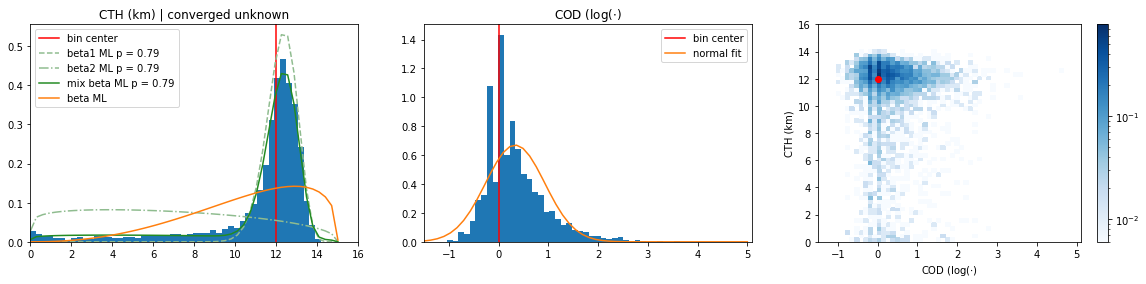

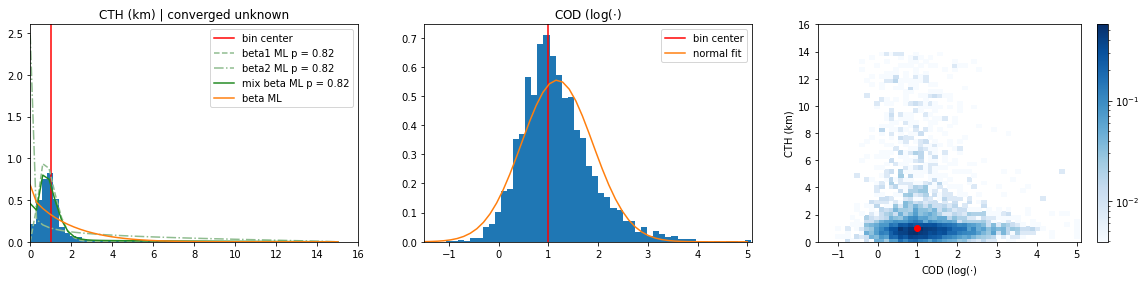

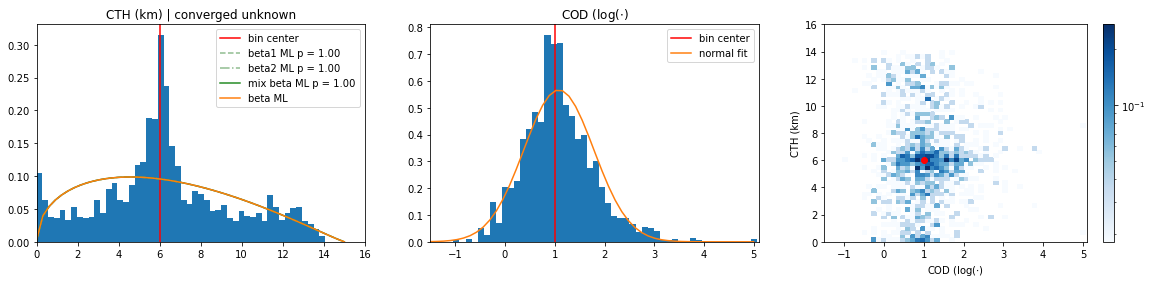

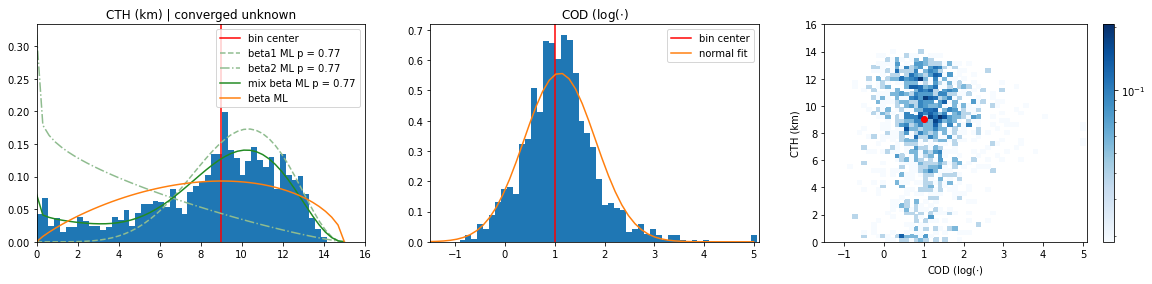

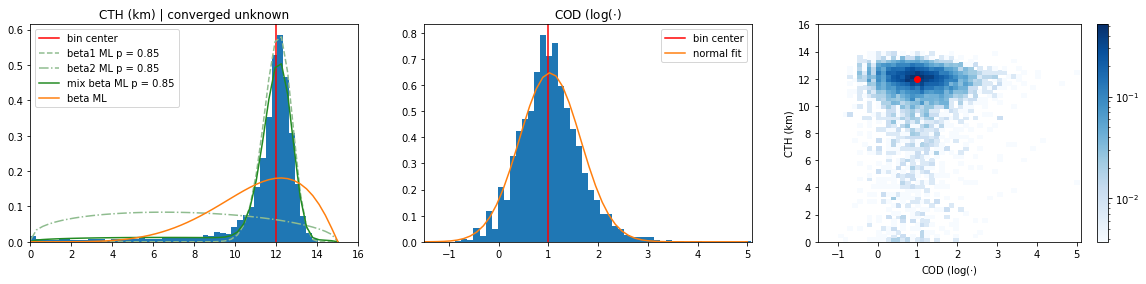

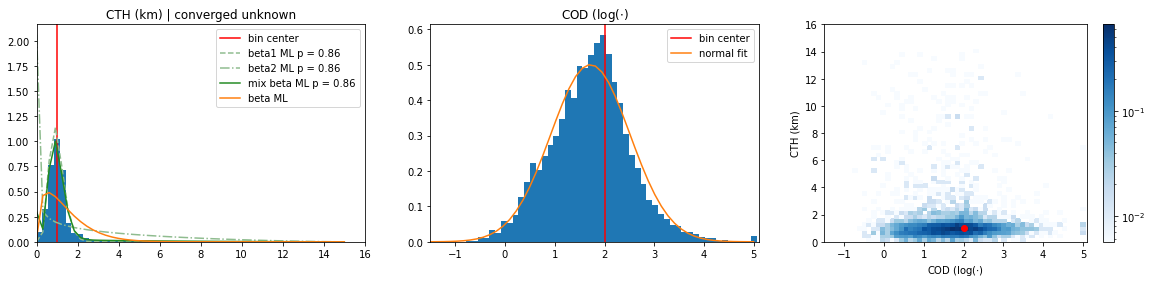

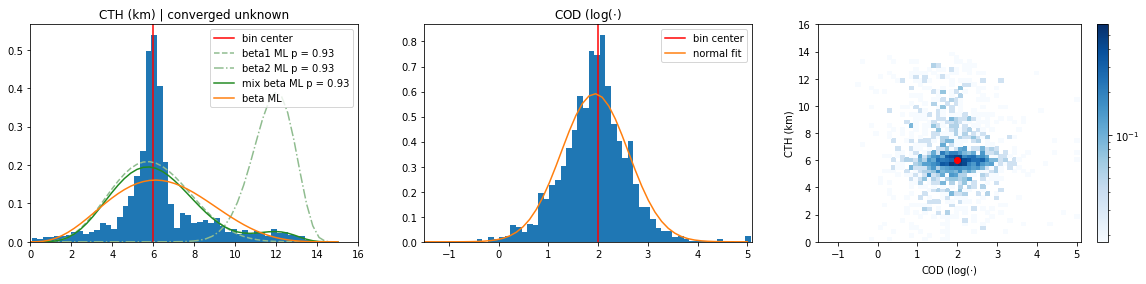

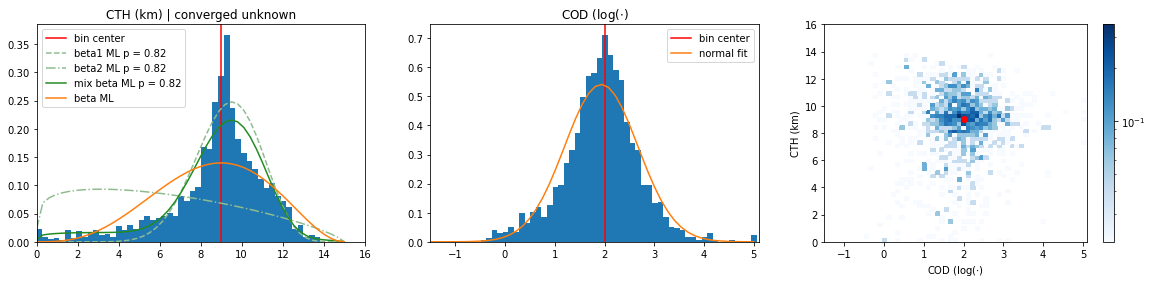

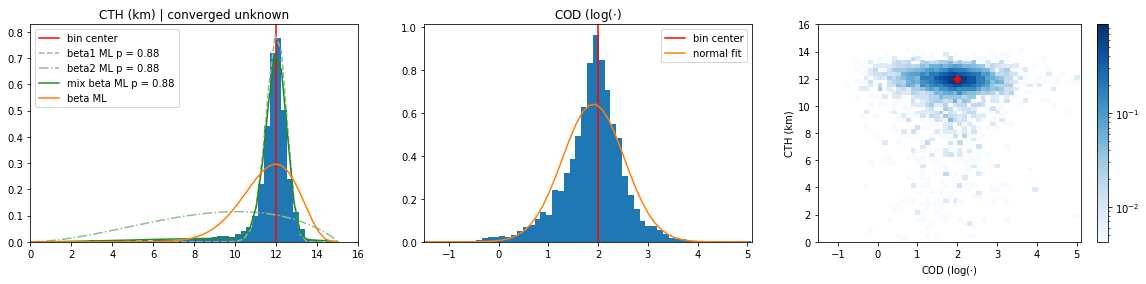

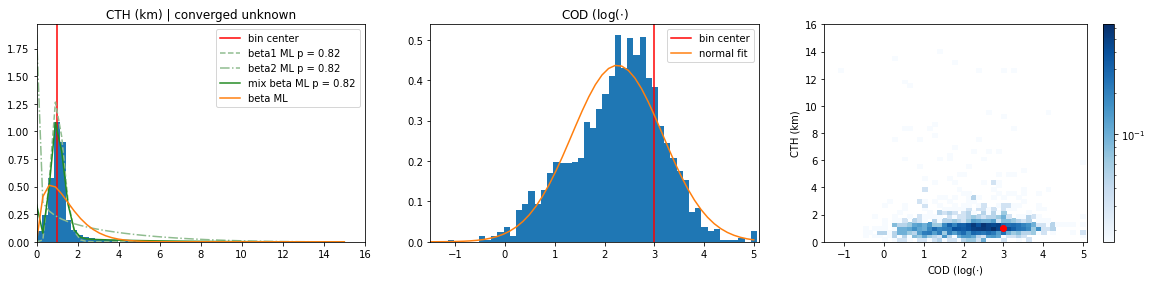

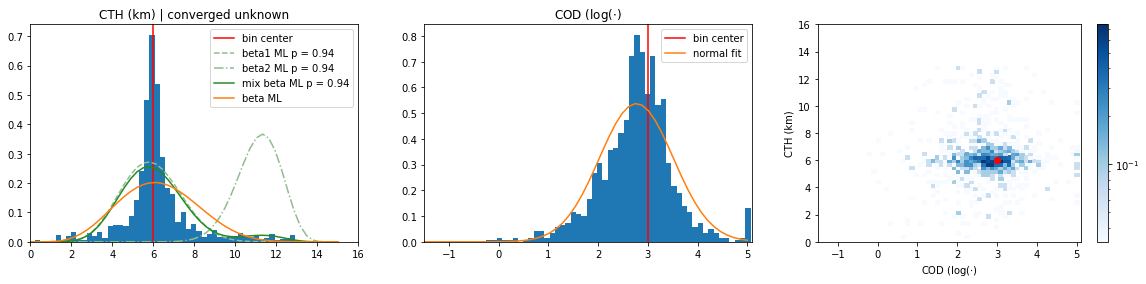

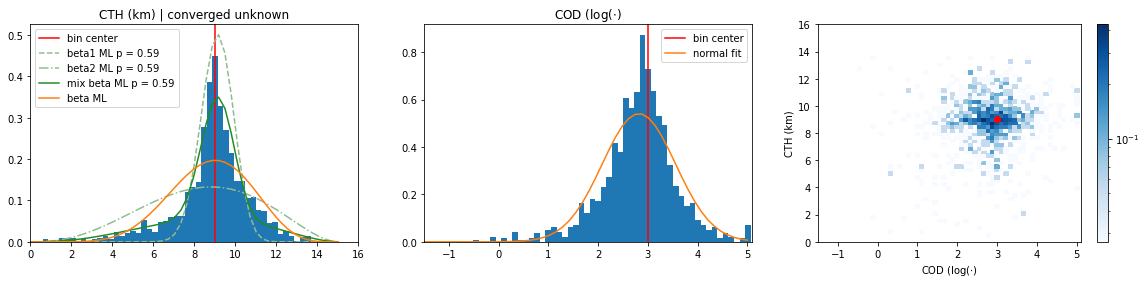

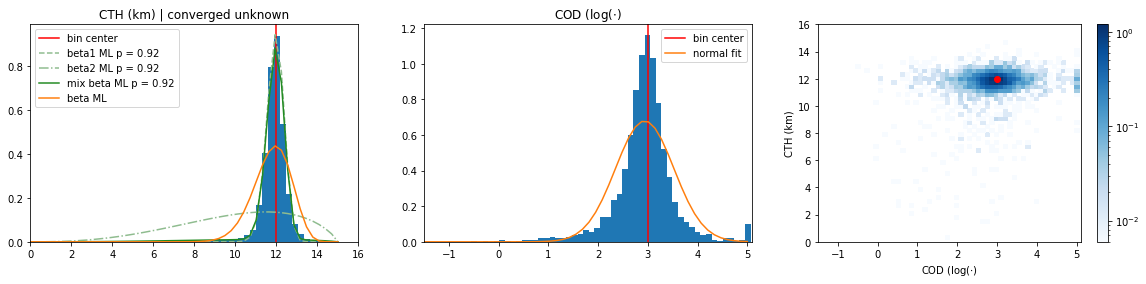

In [5]:

for idx, (h,d) in df_bin_fit[['bincenter_h', 'bincenter_d']].iterrows():
    df_bin = df.loc[(df.bincenter_h == h) & (df.bincenter_d == d)]
    param = df_bin_fit.loc[(df_bin_fit.bincenter_h == h) & (df_bin_fit.bincenter_d == d)]
    print(h,d)
    fig , ax = mp.plot_distribution_next_cloud(df_bin, ML = False, density = True) # histograms cth, cod, joint

    # bin centers
    ax[0].axvline(h*1e-3, color = 'r', label = 'bin center')
    ax[1].axvline(d, color = 'r', label = 'bin center')
    ax[2].plot(d, h*1e-3,'ro', label = 'bin center')

    # fits
    # cod
    D = np.linspace(-1.5, 5, 50)
    H = np.linspace(0, 15e3, 50)
    H_norm = ml.CTHtoUnitInt(H)

    h_beta_fit = beta(param.alpha, param.beta).pdf(H_norm)
    p = param.p.values[0] 
    
    ax[0].plot(H * 1e-3, ml.pdf_b(H_norm, param.alpha1, param.beta1) / 15, '--',
               color = 'darkseagreen', 
               label = f'beta1 ML p = {p:.2f}')
    ax[0].plot(H * 1e-3, ml.pdf_b(H_norm, param.alpha2, param.beta2) / 15, '-.',
               color = 'darkseagreen',
               label = f'beta2 ML p = {p:.2f}')
    ax[0].plot(H * 1e-3, ml.pdf_bmix(H_norm, param.alpha1, param.beta1, param.alpha2, param.beta2, p) / 15, 
               color = 'forestgreen',
               label = f'mix beta ML p = {p:.2f}')
    
    ax[0].plot(H * 1e-3, h_beta_fit / 15, label = 'beta ML')
    ax[0].legend()

    d_fit = norm(param.mu,param.sigma).pdf(D)
    ax[1].plot(D, d_fit, label = 'normal fit')
    ax[1].legend()
    
    fig.savefig(f'../fig/model1/example_bins{idx}.png')
#     plt.close()



## local behaviour parameters

In [22]:
ds = xr.open_dataset('../mod/model1/cth_param_local.nc')
ds

<xarray.Dataset>
Dimensions:  (mu_d: 5, mu_h: 26)
Coordinates:
  * mu_h     (mu_h) float64 1e+03 1.5e+03 2e+03 ... 1.25e+04 1.3e+04 1.35e+04
  * mu_d     (mu_d) int64 0 1 2 3 4
Data variables:
    alpha    (mu_h, mu_d) float64 ...
    beta     (mu_h, mu_d) float64 ...
    alpha1   (mu_h, mu_d) float64 ...
    beta1    (mu_h, mu_d) float64 ...
    alpha2   (mu_h, mu_d) float64 ...
    beta2    (mu_h, mu_d) float64 ...
    p        (mu_h, mu_d) float64 ...
    n        (mu_h, mu_d) float64 ...
    conv_b   (mu_h, mu_d) float64 ...
    conv_mb  (mu_h, mu_d) float64 ...
Attributes:
    dh:       500
    dd:       1

NameError: name 'mu1' is not defined

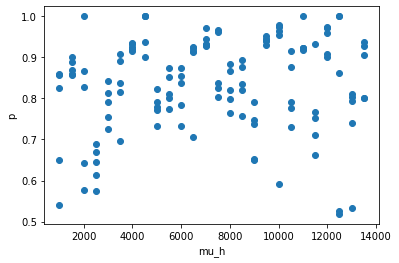

In [23]:
def meanBeta(alpha, beta):
    return alpha / (alpha + beta)
ds.plot.scatter('mu_h','p')
plt.plot(mu_h, mu1.data.reshape((n_d, n_h)).T)

Text(0.5, 0.98, 'Estimators of time distribution COD')

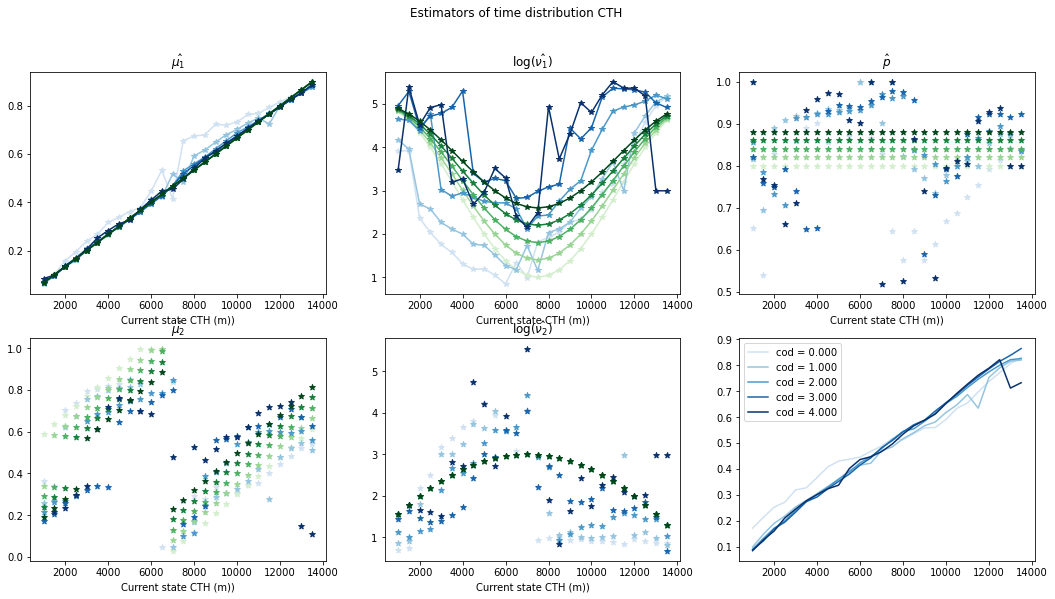

C:\Users\nerin\anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


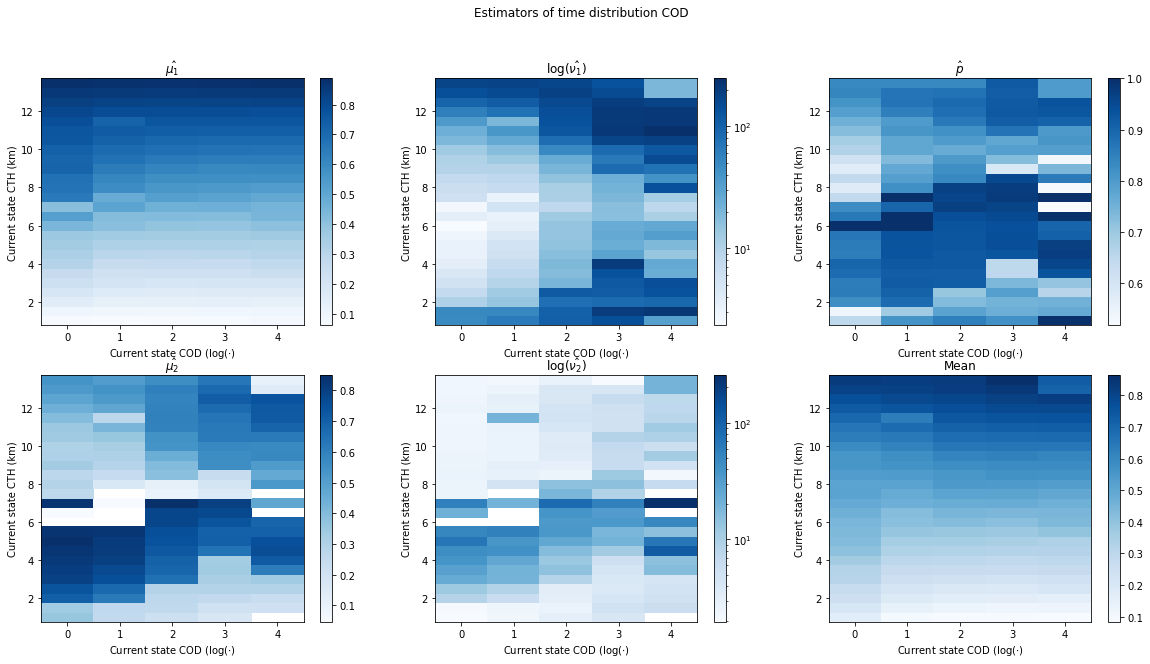

In [61]:
# cod estimators normal distribution
dh = ds.dh
dd = ds.dd
mu_h = ds.mu_h # m
mu_d = ds.mu_d
n_h = len(mu_h)
n_d = len(mu_d)
mu_h_ = np.append(mu_h - dh/2, mu_h.max() + dh/2) ## for pcolormesh
mu_d_ = np.append(mu_d - dd/2, mu_d.max() + dd/2) ## for pcolormesh
h_labels = [f'cod = {d:.3f}' for d in mu_d.data]

    
color= cm.Blues(np.linspace(.2,1, n_d))
color_ml= cm.Greens(np.linspace(.2,1, n_d))

    

fig, ax = plt.subplots(2, 3, figsize = (18, 9))


mu1 = meanBeta(ds.alpha1, ds.beta1)
nu1 = ds.alpha1 + ds.beta1
mu2 = meanBeta(ds.alpha2, ds.beta2)
nu2 = ds.alpha2 + ds.beta2
p = ds.p 

### verkeerd om ! fix TODO
mu1 = mu1.data.reshape((n_d, n_h)).T
nu1 = nu1.data.reshape((n_d, n_h)).T
mu2 = mu2.data.reshape((n_d, n_h)).T
nu2 = nu2.data.reshape((n_d, n_h)).T
p = p.data.reshape((n_d, n_h)).T

#start param global 
def mu1_est(h, d):
    return h / ml.h_max

gamma1 = np.array([5, 2 * np.pi / ml.h_max , 3, .2])

def nu1_est(h, d, gamma1 = gamma1):
    a = gamma1[2] + gamma1[3] *d
    return (gamma1[0] - a) * np.cos(gamma1[1] * h) + a

a = np.array([.8, .02])

def prob(h, d, a = a):
    return a[0] + a[1] * d

ab = np.array([.9e-4, .3, .5, -.6, -.05, .35, 7e3])

def mu2_est(h, d, ab = ab):
    a = ab[:5]
    b = ab[5:7]
    
    if a[1] + a[4] * d + a[0] * h < b[0]:
        out = a[1] + a[4] * d + a[0] * h 
    elif h < b[1]:
        out = a[2] + a[4] * d + a[0] * h
    else:
        out = a[3] - a[4] * d + a[0] * h
    
    if out <= 0:
        out = .001
    elif out >= 1:
        out = .999
    return out
    
gamma2 = np.array([-2/5 *1e-7, 3])

def nu2_est(h, d, gamma2 = gamma2):
    return gamma2[0] * (h - 7e3) ** 2 + gamma2[1]



mean = np.nansum(np.dstack((p * mu1,(1 - p) * mu2)),2)

title = ['$\\hat{\\mu_1}$', '$\\log(\\hat{\\nu_1})$', '$\\hat{p}$', 
         '$\\hat{\\mu_2}$', '$\\log(\\hat{\\nu_2})$', 'Mean']

for i, c, c_ml, label in zip(range(n_d), color, color_ml, h_labels):
    ax[0,0].plot(mu_h, mu1[:,i], label = label, c = c, 
                marker = '*', 
               # ls = '--'
               )
    ax[0,0].plot(mu_h, mu1_est(mu_h, mu_d[i]), label = label + ' start_param', c = c_ml, 
                marker = '*', 
               # ls = '--'
               )
    ax[0,1].plot(mu_h, np.log(nu1[:,i]), label = label, c = c,
                marker = '*', 
               # ls = '--'
               )
    ax[0,1].plot(mu_h, nu1_est(mu_h,mu_d[i]), label = label, c = c_ml,
                marker = '*', 
               # ls = '--'
               )
#     ax[0,1].set(yscale = 'log')
    ax[0,2].scatter(mu_h, p[:,i], label = label, color = c,
                marker = '*', 
               # ls = '--'
               )
#     ax[0,2].scatter(mu_h, np.array([p[:,i].mean() for hi in mu_h]), label = label, color = c,
# #                 marker = '*', 
#                # ls = '--'
#                )    
    ax[0,2].scatter(mu_h, np.array([prob(hi, mu_d[i]) for hi in mu_h]), label = label, color = c_ml,
                marker = '*', 
               # ls = '--'
               )
    ax[1,0].scatter(mu_h, mu2[:,i], label = label, color = c,
                marker = '*', 
               # ls = '--'
               )
    ax[1,0].scatter(mu_h, np.array([mu2_est(hi, mu_d[i]) for hi in mu_h]), label = label, color = c_ml,
                marker = '*', 
               # ls = '--'
               )
    ax[1,1].scatter(mu_h, np.log(nu2[:,i]), label = label, color = c,
                marker = '*', 
               # ls = '--'
               )
    ax[1,1].scatter(mu_h, nu2_est(mu_h, mu_d[i]), label = label, color = c_ml,
                marker = '*', 
               # ls = '--'
               )
#     ax[1,1].set(yscale = 'log')

    ax[1,2].plot(mu_h, mean[:,i], label = label, c = c)
    ax[1,2].legend()

for axs, titles in zip(ax.flatten()[:-1], title):
    axs.set(xlabel = 'Current state CTH (m))',
          # ylabel = '$\hat{\mu_d}$',
          title = titles)
#     if titles != '$\\hat{p}$':
#         axs.set(yscale = 'log')
    


fig.suptitle('Estimators of time distribution CTH')


fig, ax = plt.subplots(2, 3, figsize = (20, 10))

im = ax[0,0].pcolormesh(mu_d_, mu_h_ * 1e-3, mu1, cmap = cm.Blues)
plt.colorbar(im, ax=ax[0,0],
             # label = title[0]
             )

im = ax[0,1].pcolormesh(mu_d_, mu_h_ * 1e-3, nu1, cmap = cm.Blues,
                        norm=mpl.colors.LogNorm()
                       )
plt.colorbar(im, ax=ax[0,1],
             # label = title[1]
             )
im = ax[0,2].pcolormesh(mu_d_, mu_h_ * 1e-3, p, cmap = cm.Blues)
plt.colorbar(im, ax=ax[0,2],
             # label = title[2]
             )
im = ax[1,0].pcolormesh(mu_d_, mu_h_ * 1e-3, mu2, cmap = cm.Blues)
plt.colorbar(im, ax=ax[1,0],
             # label = title[3]
             )
im = ax[1,1].pcolormesh(mu_d_, mu_h_ * 1e-3, nu2, cmap = cm.Blues,
                        norm=mpl.colors.LogNorm()
                       )
plt.colorbar(im, ax=ax[1,1],
             # label = title[4]
             )
im = ax[1,2].pcolormesh(mu_d_, mu_h_ * 1e-3, mean, cmap = cm.Blues)
plt.colorbar(im, ax=ax[1,2],
             # label = title[0]
             )

for axs, title in zip(ax.flatten()[:len(title)], title):
    axs.set(xlabel = 'Current state COD (log($\cdot$)',
          ylabel = 'Current state CTH (km)',
          title = title)

fig.suptitle('Estimators of time distribution COD')

In [ ]:
print('cth global fit')
## ml estimation COD deep params
model1_cth = ml.MyDepMixBetaML(df.h_t_next,df[['h_t', 'd_t']])
sm_ml_cth = model1_cth.fit()
df_cth = pd.DataFrame(sm_ml_cth._cache)
df_cth['coef'] = sm_ml_cth.params
df_cth['names'] = model1_cth.exog_names
df_cth.to_csv(loc_model1 + 'model1_cth.csv')
    

cth global fit
[ 5.0000000e+00  4.1887902e-04  3.0000000e+00  2.0000000e-01
  8.0000000e-01  2.0000000e-02  9.0000000e-05  3.0000000e-01
  5.0000000e-01 -6.0000000e-01 -5.0000000e-02  3.5000000e-01
  7.0000000e+03 -4.0000000e-08  3.0000000e+00]
[ 5.2500000e+00  4.1887902e-04  3.0000000e+00  2.0000000e-01
  8.0000000e-01  2.0000000e-02  9.0000000e-05  3.0000000e-01
  5.0000000e-01 -6.0000000e-01 -5.0000000e-02  3.5000000e-01
  7.0000000e+03 -4.0000000e-08  3.0000000e+00]
[ 5.00000000e+00  4.39822972e-04  3.00000000e+00  2.00000000e-01
  8.00000000e-01  2.00000000e-02  9.00000000e-05  3.00000000e-01
  5.00000000e-01 -6.00000000e-01 -5.00000000e-02  3.50000000e-01
  7.00000000e+03 -4.00000000e-08  3.00000000e+00]
[ 5.0000000e+00  4.1887902e-04  3.1500000e+00  2.0000000e-01
  8.0000000e-01  2.0000000e-02  9.0000000e-05  3.0000000e-01
  5.0000000e-01 -6.0000000e-01 -5.0000000e-02  3.5000000e-01
  7.0000000e+03 -4.0000000e-08  3.0000000e+00]
[ 5.0000000e+00  4.1887902e-04  3.0000000e+00  2.1

In [ ]:
print(sm_ml_cth.summary())